<a href="https://colab.research.google.com/github/singiresutagore/NeuroNexus/blob/main/fraud_trancation_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
train_data=pd.read_csv('/content/fraudTrain.csv',nrows=5000)
train_data.head()


Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [7]:
train_data.info()
train_data.dropna(inplace=True)
train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5000 non-null   int64  
 1   trans_date_trans_time  5000 non-null   object 
 2   cc_num                 5000 non-null   int64  
 3   merchant               5000 non-null   object 
 4   category               5000 non-null   object 
 5   amt                    5000 non-null   float64
 6   first                  5000 non-null   object 
 7   last                   5000 non-null   object 
 8   gender                 5000 non-null   object 
 9   street                 5000 non-null   object 
 10  city                   5000 non-null   object 
 11  state                  5000 non-null   object 
 12  zip                    5000 non-null   int64  
 13  lat                    5000 non-null   float64
 14  long                   5000 non-null   float64
 15  city

(5000, 23)

In [13]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"] = pd.to_datetime(train_data["dob"])
train_data

Unnamed: 0 trans_date_trans_time            cc_num  \
0              0   2019-01-01 00:00:18  2703186189652095   
1              1   2019-01-01 00:00:44      630423337322   
2              2   2019-01-01 00:00:51    38859492057661   
3              3   2019-01-01 00:01:16  3534093764340240   
4              4   2019-01-01 00:03:06   375534208663984   
...          ...                   ...               ...   
4995        4995   2019-01-04 05:09:49  2235335206132667   
4996        4996   2019-01-04 05:12:33   375237305371366   
4997        4997   2019-01-04 05:13:23  2235335206132667   
4998        4998   2019-01-04 05:14:46      502012776709   
4999        4999   2019-01-04 05:15:54  4010002218955876   

                                merchant       category      amt      first  \
0             fraud_Rippin, Kub and Mann       misc_net     4.97   Jennifer   
1        fraud_Heller, Gutmann and Zieme    grocery_pos   107.23  Stephanie   
2                   fraud_Lind-Buckridge  entertainment   220.11     Edward   
3     fraud_Kutch, Hermiston and Farrell  gas_transport    45.00     Jeremy   
4                    fraud_Keeling-Crist       misc_pos    41.96      Tyler   
...                                  ...            ...      ...        ...   
4995                     fraud_Lynch Ltd   shopping_pos  1180.30      Maria   
4996                 fraud_Friesen-Stamm  gas_transport    83.47      David   
4997                   fraud_Paucek-Wiza    grocery_net    36.64      Maria   
4998                     fraud_Welch Inc       misc_net     6.21     Sherry   
4999   fraud_Schoen, Kuphal and Nitzsche    grocery_pos   224.88   Jennifer   

          last gender                        street  ...      lat      long  \
0        Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1         Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2      Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3        White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4       Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   
...        ...    ...                           ...  ...      ...       ...   
4995   Rosales      F  6611 Parrish Garden Apt. 428  ...  40.6072  -83.9585   
4996  Erickson      M   616 Jimenez Meadow Apt. 701  ...  43.1128  -77.4906   
4997   Rosales      F  6611 Parrish Garden Apt. 428  ...  40.6072  -83.9585   
4998  Martinez      F         144 Yu Locks Apt. 754  ...  42.6315  -75.1866   
4999    Bishop      F            589 Matthew Brooks  ...  29.7972  -95.3288   

      city_pop                                job        dob  \
0         3495          Psychologist, counselling 1988-03-09   
1          149  Special educational needs teacher 1978-06-21   
2         4154        Nature conservation officer 1962-01-19   
3         1939                    Patent attorney 1967-01-12   
4           99     Dance movement psychotherapist 1986-03-28   
...        ...                                ...        ...   
4995      2089          Building control surveyor 1963-06-22   
4996      8019                       Retail buyer 1928-06-26   
4997      2089          Building control surveyor 1963-06-22   
4998       165                    Naval architect 1945-09-20   
4999   2906700                           Animator 1983-08-24   

                             trans_num   unix_time  merch_lat  merch_long  \
0     0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1     1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2     a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3     6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4     a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                ...         ...        ...         ...   
4995  44827746427d28ce90c337b84cdad67c  1325653789  40.438221  -83.485925   
49

In [14]:
train_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data

merchant       category      amt gender  \
0             fraud_Rippin, Kub and Mann       misc_net     4.97      F   
1        fraud_Heller, Gutmann and Zieme    grocery_pos   107.23      F   
2                   fraud_Lind-Buckridge  entertainment   220.11      M   
3     fraud_Kutch, Hermiston and Farrell  gas_transport    45.00      M   
4                    fraud_Keeling-Crist       misc_pos    41.96      M   
...                                  ...            ...      ...    ...   
4995                     fraud_Lynch Ltd   shopping_pos  1180.30      F   
4996                 fraud_Friesen-Stamm  gas_transport    83.47      M   
4997                   fraud_Paucek-Wiza    grocery_net    36.64      F   
4998                     fraud_Welch Inc       misc_net     6.21      F   
4999   fraud_Schoen, Kuphal and Nitzsche    grocery_pos   224.88      F   

          lat      long  city_pop                                job  \
0     36.0788  -81.1781      3495          Psychologist, counselling   
1     48.8878 -118.2105       149  Special educational needs teacher   
2     42.1808 -112.2620      4154        Nature conservation officer   
3     46.2306 -112.1138      1939                    Patent attorney   
4     38.4207  -79.4629        99     Dance movement psychotherapist   
...       ...       ...       ...                                ...   
4995  40.6072  -83.9585      2089          Building control surveyor   
4996  43.1128  -77.4906      8019                       Retail buyer   
4997  40.6072  -83.9585      2089          Building control surveyor   
4998  42.6315  -75.1866       165                    Naval architect   
4999  29.7972  -95.3288   2906700                           Animator   

       unix_time  merch_lat  merch_long  is_fraud  
0     1325376018  36.011293  -82.048315         0  
1     1325376044  49.159047 -118.186462         0  
2     1325376051  43.150704 -112.154481         0  
3     1325376076  47.034331 -112.561071         0  
4     1325376186  38.674999  -78.632459         0  
...          ...        ...         ...       ...  
4995  1325653789  40.438221  -83.485925         0  
4996  1325653953  42.415407  -78.158282         0  
4997  1325654003  40.958936  -84.629338         0  
4998  1325654086  43.269532  -76.124026         0  
4999  1325654154  30.581495  -95.989099         0  

[5000 rows x 12 columns]

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])


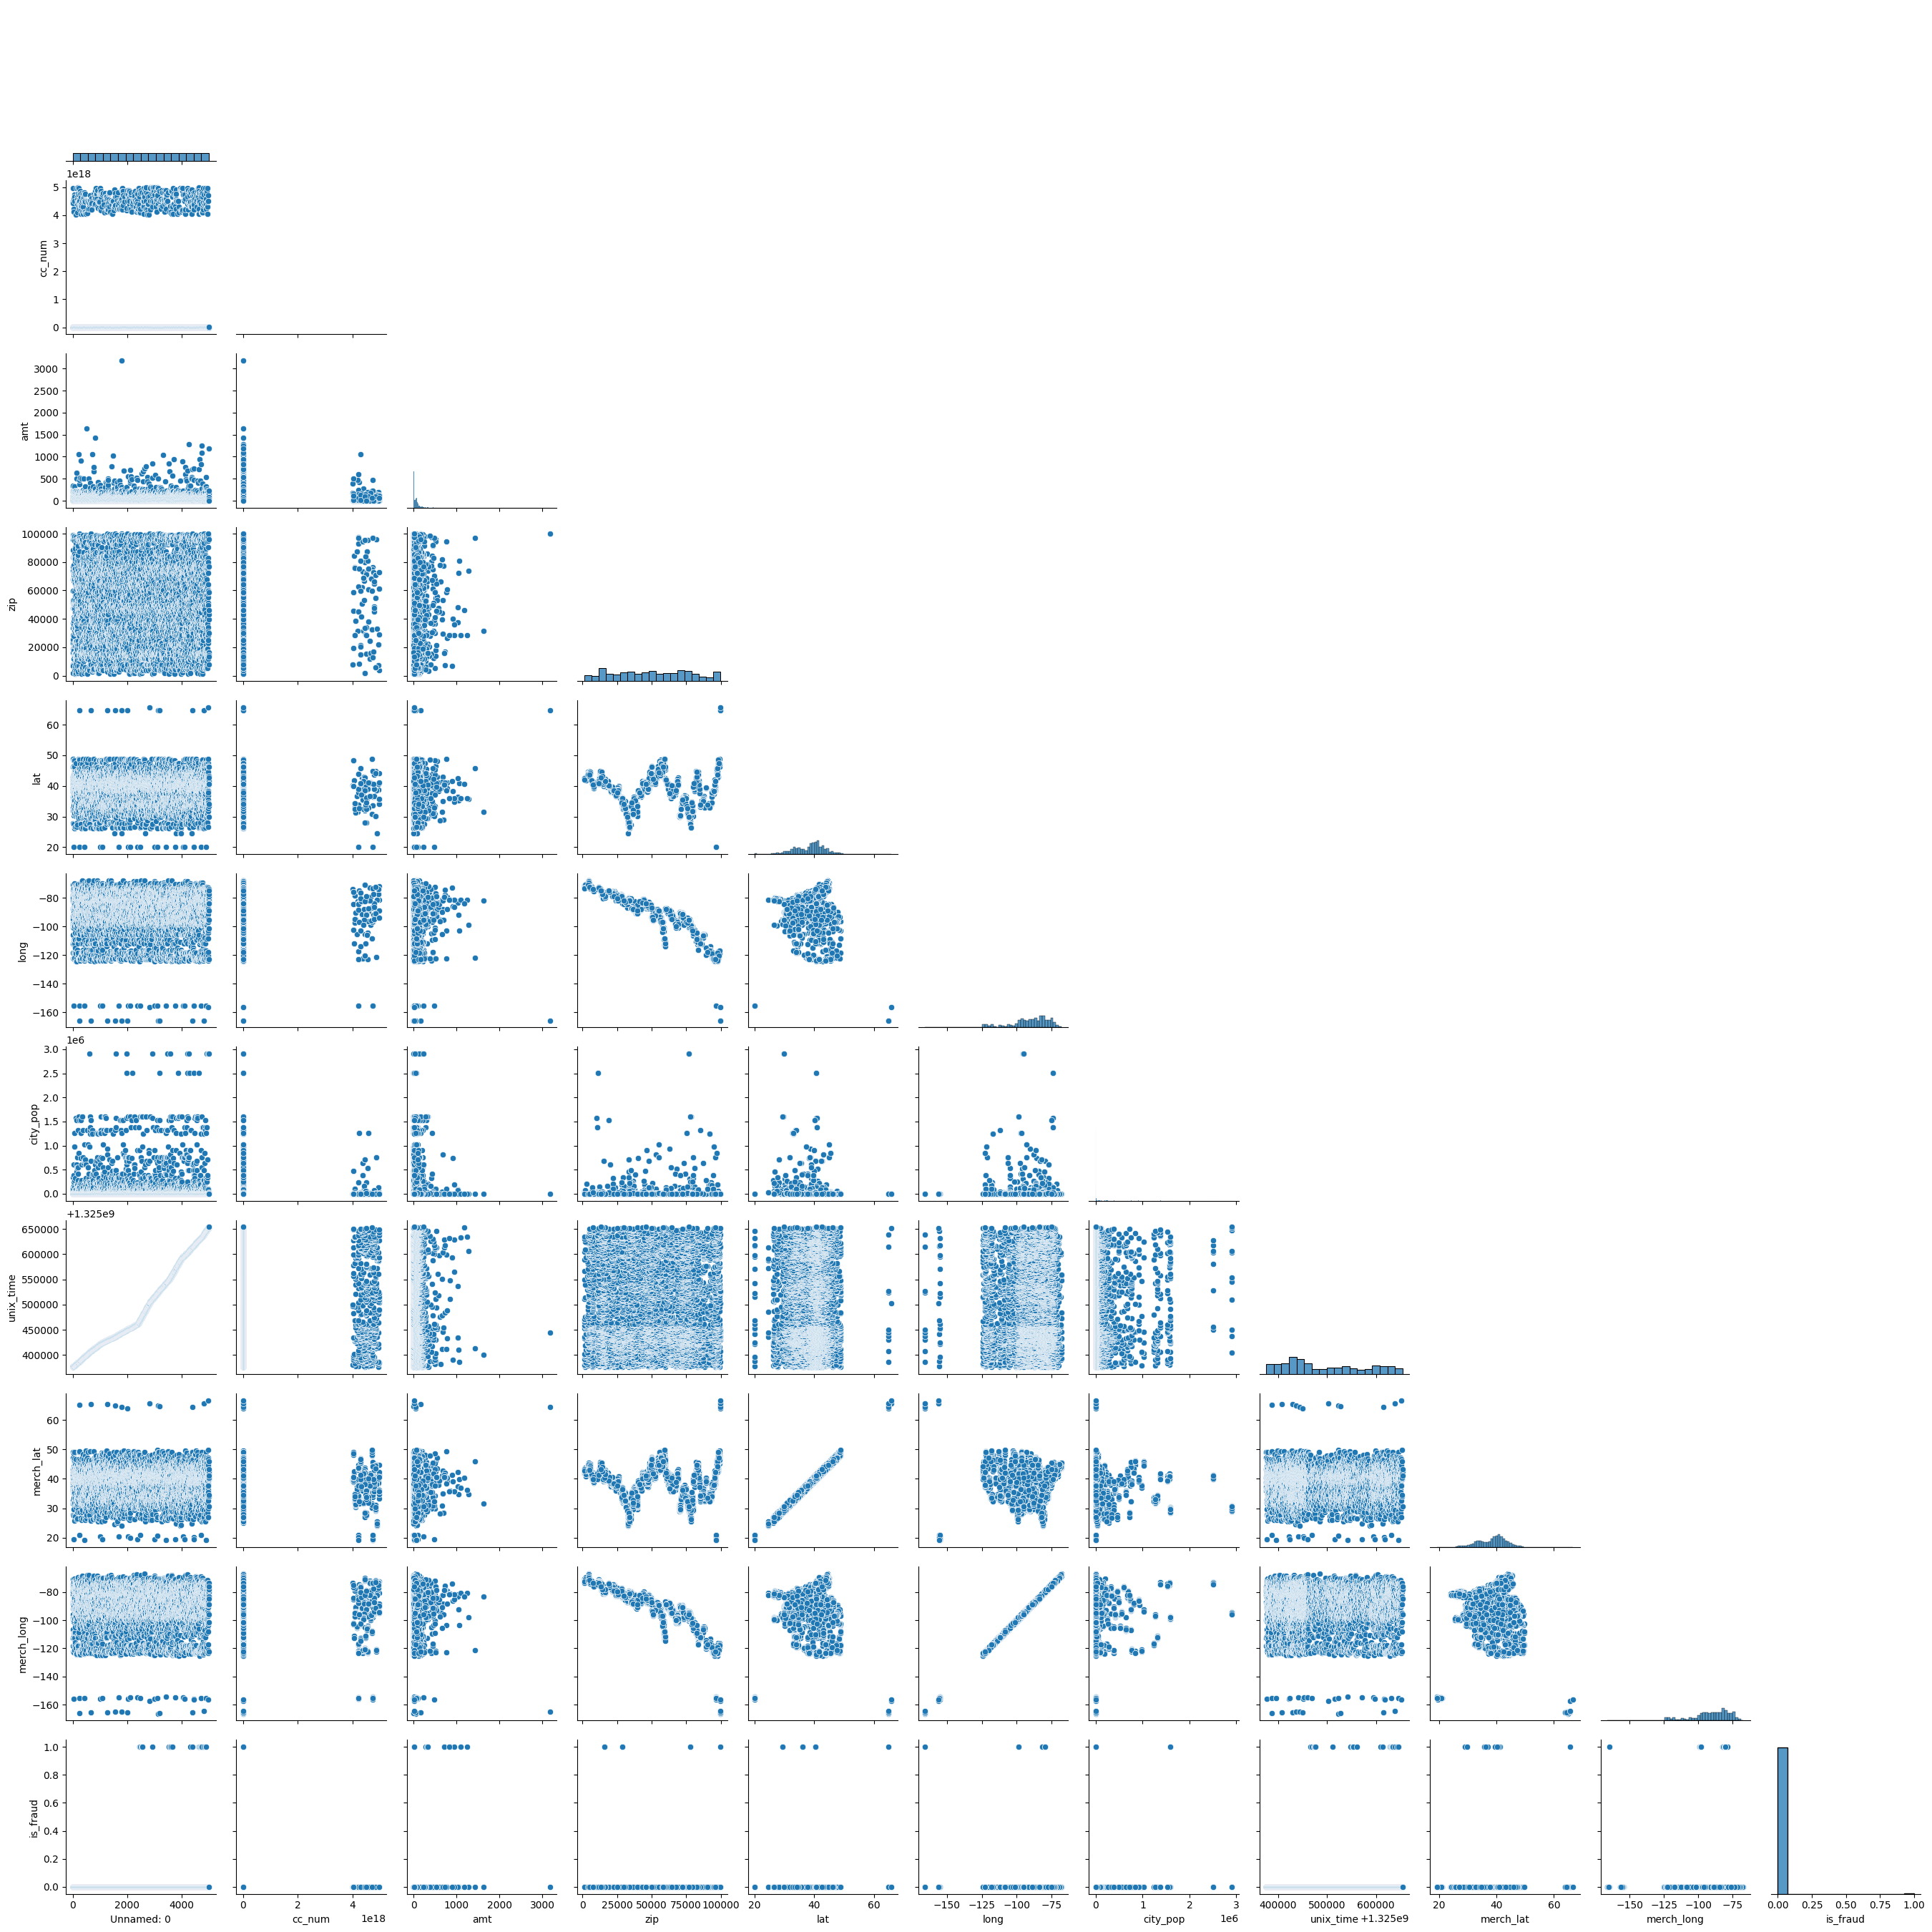

In [8]:
sns.pairplot(train_data,corner=True)
plt.show()

In [9]:

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

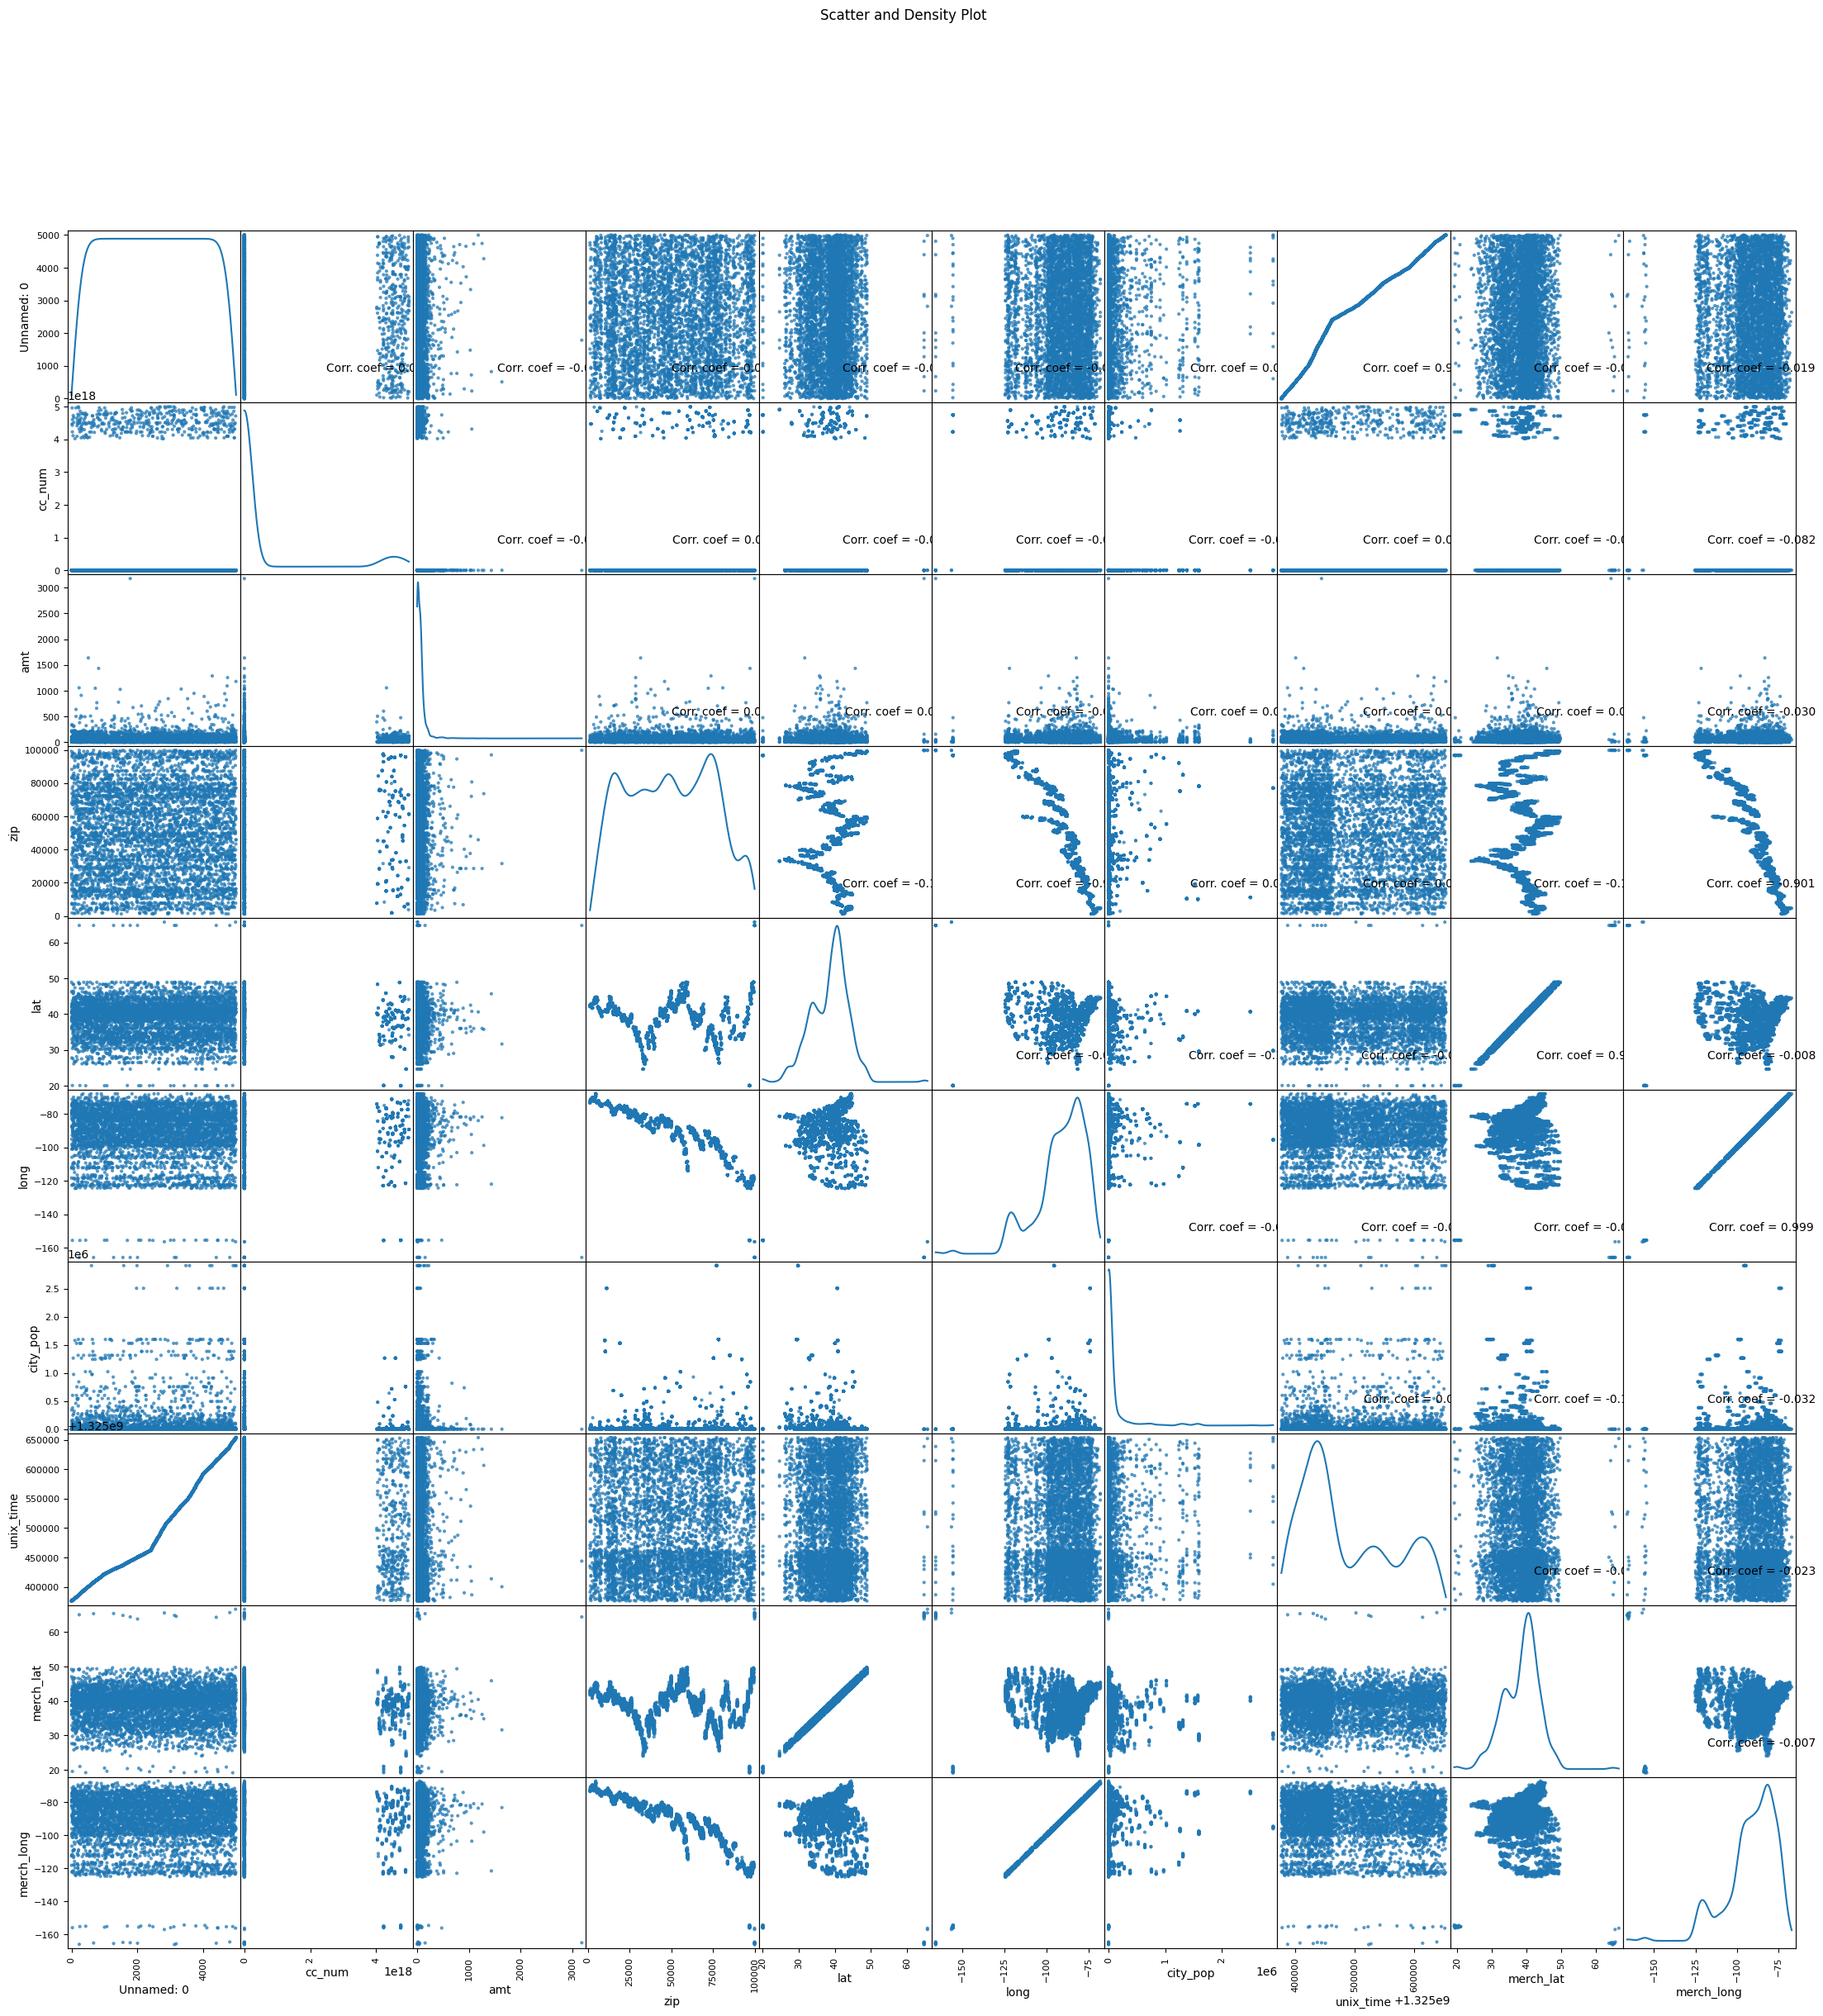

In [10]:
plotScatterMatrix(train_data, 27, 10)

In [11]:

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) //nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

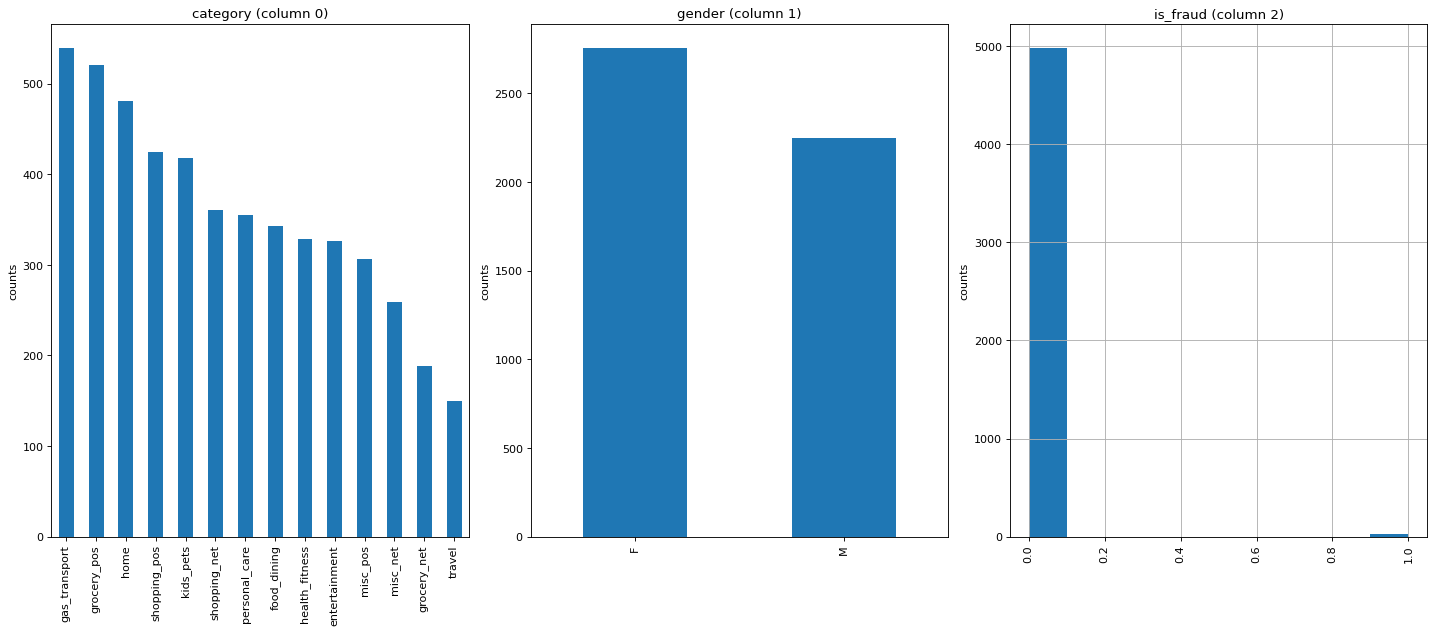

In [12]:
plotPerColumnDistribution(train_data, 10, 5)

In [18]:
X = train_data.drop(columns=["is_fraud"], inplace = False)
Y = train_data["is_fraud"]
model = SVC()
model.fit(X, Y)
model.score(X, Y)

0.9956

In [20]:
test_data = pd.read_csv("/content/fraudTest.csv",nrows=5000)
test_data

Unnamed: 0 trans_date_trans_time            cc_num  \
0              0   2020-06-21 12:14:25  2291163933867244   
1              1   2020-06-21 12:14:33  3573030041201292   
2              2   2020-06-21 12:14:53  3598215285024754   
3              3   2020-06-21 12:15:15  3591919803438423   
4              4   2020-06-21 12:15:17  3526826139003047   
...          ...                   ...               ...   
4995        4995   2020-06-22 18:39:08   377026671291680   
4996        4996   2020-06-22 18:39:16   213125815021702   
4997        4997   2020-06-22 18:39:58  6011652924285713   
4998        4998   2020-06-22 18:40:30  3541160328600277   
4999        4999   2020-06-22 18:40:33  4158945090781624   

                                  merchant        category    amt    first  \
0                    fraud_Kirlin and Sons   personal_care   2.86     Jeff   
1                     fraud_Sporer-Keebler   personal_care  29.84   Joanne   
2     fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28   Ashley   
3                        fraud_Haley Group        misc_pos  60.05    Brian   
4                    fraud_Johnston-Casper          travel   3.19   Nathan   
...                                    ...             ...    ...      ...   
4995                       fraud_Fadel Inc  health_fitness  19.53   Jackie   
4996       fraud_Kling, Howe and Schneider            home  37.48     Adam   
4997     fraud_Hermiston, Russel and Price     food_dining   6.79  Kathryn   
4998  fraud_Swaniawski, Nitzsche and Welch  health_fitness   1.42    Jason   
4999  fraud_Roberts, Daniel and Macejkovic       kids_pets  54.63   Justin   

          last gender                        street  ...      lat      long  \
0      Elliott      M             351 Darlene Green  ...  33.9659  -80.9355   
1     Williams      F              3638 Marsh Union  ...  40.3207 -110.4360   
2        Lopez      F          9333 Valentine Point  ...  40.6729  -73.5365   
3     Williams      M   32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4       Massey      M      5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...        ...    ...                           ...  ...      ...       ...   
4995     Davis      F     1898 Parker Fork Apt. 057  ...  37.3272  -91.0243   
4996      Kirk      M         40847 Stark Junctions  ...  42.0740  -74.4530   
4997     Smith      F  19838 Tonya Prairie Apt. 947  ...  38.2911  -92.7059   
4998     Singh      M                4720 Anna Ways  ...  39.5723  -90.2379   
4999      Bell      M            5323 Walker Island  ...  40.4308  -79.9205   

      city_pop                              job         dob  \
0       333497              Mechanical engineer  1968-03-19   
1          302           Sales professional, IT  1990-01-17   
2        34496                Librarian, public  1970-10-21   
3        54767                     Set designer  1987-07-25   
4         1126               Furniture designer  1955-07-06   
...        ...                              ...         ...   
4995       241               Investment analyst  1974-10-27   
4996       397                     Psychiatrist  1931-09-12   
4997      1847                    Tax inspector  1988-10-26   
4998      1512  Commercial/residential surveyor  2003-05-07   
4999    687276                Scientist, marine  1973-10-19   

                             trans_num   unix_time  merch_lat  merch_long  \
0     2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1     324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2     c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3     2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4     57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                ...         ...        ...         ...   
4995  5fff6d170ebf5e1deac05c62e854c0c6  1371926348  37.406922  -90.809249   
4996  ecebb3858c2a874be9a4

In [21]:
test_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
encoder = LabelEncoder()
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [22]:
test_data

merchant  category    amt  gender      lat      long  city_pop  job  \
0          316        10   2.86       1  33.9659  -80.9355    333497  270   
1          586        10  29.84       0  40.3207 -110.4360       302  384   
2          606         5  41.28       0  40.6729  -73.5365     34496  254   
3          220         9  60.05       1  28.5697  -80.8191     54767  399   
4          289        13   3.19       1  44.2529  -85.0170      1126  192   
...        ...       ...    ...     ...      ...       ...       ...  ...   
4995       165         5  19.53       0  37.3272  -91.0243       241  238   
4996       319         6  37.48       1  42.0740  -74.4530       397  348   
4997       246         1   6.79       0  38.2911  -92.7059      1847  422   
4998       606         5   1.42       1  39.5723  -90.2379      1512   86   
4999       514         7  54.63       1  40.4308  -79.9205    687276  390   

       unix_time  merch_lat  merch_long  is_fraud  
0     1371816865  33.986391  -81.200714         0  
1     1371816873  39.450498 -109.960431         0  
2     1371816893  40.495810  -74.196111         0  
3     1371816915  28.812398  -80.883061         0  
4     1371816917  44.959148  -85.884734         0  
...          ...        ...         ...       ...  
4995  1371926348  37.406922  -90.809249         0  
4996  1371926356  41.951789  -74.605906         0  
4997  1371926398  37.802784  -93.461897         0  
4998  1371926430  39.261794  -90.922877         0  
4999  1371926433  39.780460  -79.529289         0  

[5000 rows x 12 columns]

In [24]:
X_test = test_data.drop(columns=["is_fraud"], inplace = False)
Y_test = test_data["is_fraud"]
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
accuracy = accuracy_score(test_data['is_fraud'],y_pred)
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 99.64%


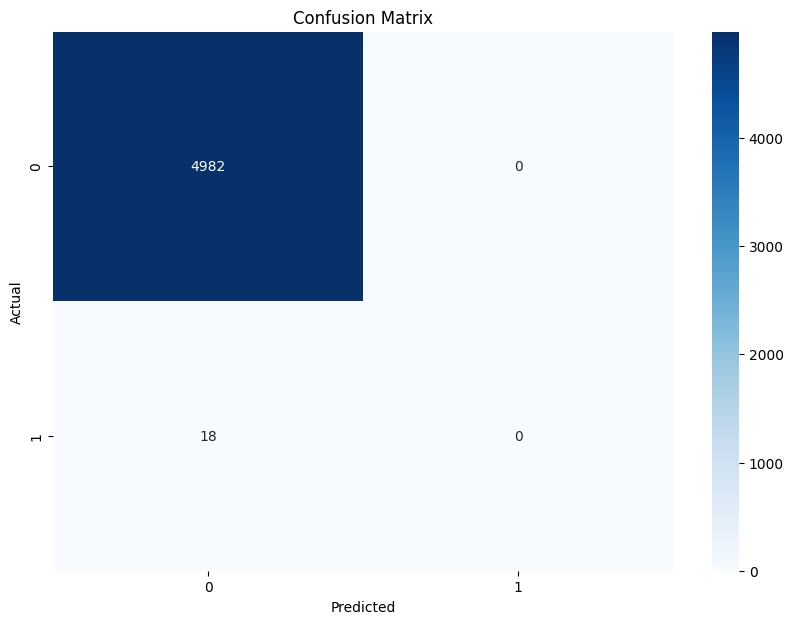

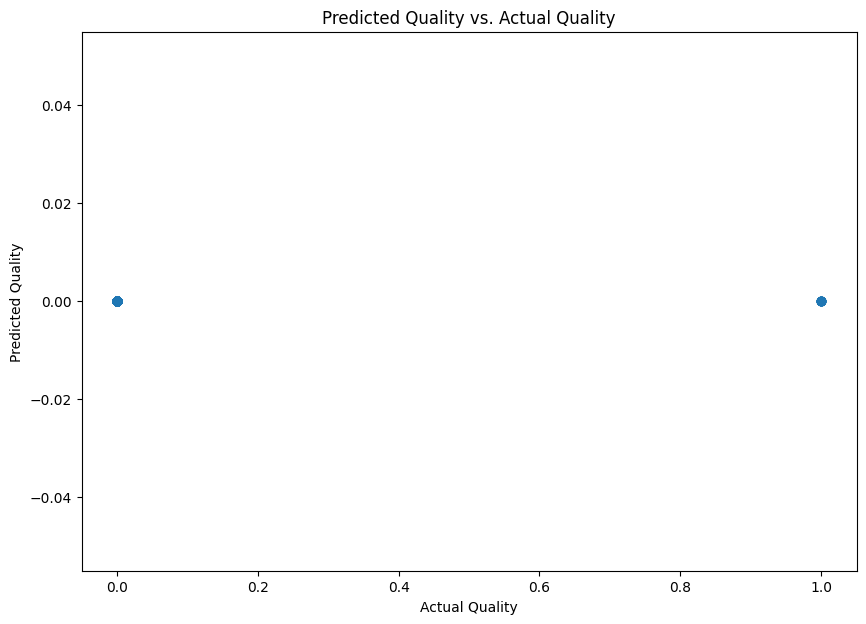

In [27]:

conf_matrix = confusion_matrix(test_data['is_fraud'], y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(test_data['is_fraud'], y_pred, alpha=0.5)
plt.title("Predicted Quality vs. Actual Quality")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.show()